In [164]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('magma')
%matplotlib inline

In [165]:
dir = "hotel_bookings.csv"

df = pd.read_csv(dir)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [167]:
import calendar
cal = {v: k for k,v in enumerate(calendar.month_name)}
df['arrival_date_month'] = df['arrival_date_month'].map(cal)

In [168]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [169]:
100 * df.isnull().sum()/len(df)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [170]:
df=df.drop(['agent','company','reservation_status_date'],axis=1)

In [171]:
df = df.dropna()

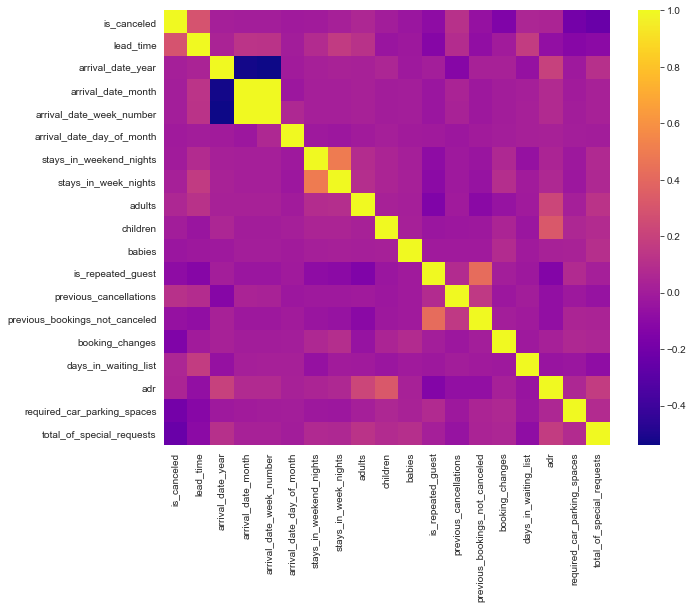

In [172]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='plasma')

In [173]:
df.corr()['is_canceled'][1:].sort_values()

total_of_special_requests        -0.235643
required_car_parking_spaces      -0.194796
booking_changes                  -0.144659
is_repeated_guest                -0.085179
previous_bookings_not_canceled   -0.055493
babies                           -0.032521
arrival_date_day_of_month        -0.006127
stays_in_weekend_nights          -0.002631
children                          0.004751
arrival_date_week_number          0.007465
arrival_date_month                0.010305
arrival_date_year                 0.016412
stays_in_week_nights              0.024110
adr                               0.046199
days_in_waiting_list              0.054016
adults                            0.058381
previous_cancellations            0.109922
lead_time                         0.291994
Name: is_canceled, dtype: float64

In [174]:
df.groupby('arrival_date_month').mean()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
arrival_date_month,,,,,,,,,,,,,,,,,,
1,0.307457,45.699013,2016.622915,2.982295,16.093803,0.784644,2.199694,1.694586,0.076949,0.008172,0.067586,0.089717,0.296561,0.249234,2.550051,70.633827,0.080865,0.548689
2,0.336370,48.152771,2016.518597,7.414129,15.777209,0.856715,2.184348,1.794558,0.098228,0.007364,0.051298,0.075761,0.167998,0.191837,0.770220,73.815056,0.063155,0.526460
3,0.323236,70.479618,2016.508368,11.589794,16.339665,0.862614,2.566999,1.807886,0.071876,0.005853,0.043639,0.027313,0.176815,0.222302,1.384742,80.905435,0.060581,0.498203
4,0.408511,95.115618,2016.510729,15.996469,16.311182,0.950385,2.421820,1.879131,0.103214,0.004799,0.025622,0.042553,0.121050,0.226075,3.024445,100.594148,0.056677,0.522770
5,0.397063,117.760506,2016.535954,20.269802,16.030478,0.869853,2.408014,1.827405,0.071738,0.006113,0.031072,0.018253,0.152560,0.217336,4.343493,108.744701,0.051872,0.532982
6,0.414935,128.367621,2016.516793,24.555230,15.120893,0.920838,2.656813,1.861261,0.096733,0.006498,0.025808,0.021598,0.152832,0.192276,1.957262,116.712740,0.055459,0.564382
7,0.375040,136.536110,2016.201932,28.996912,16.114745,1.119021,2.800285,1.988518,0.183798,0.009503,0.023836,0.116566,0.120130,0.217057,0.230519,126.825223,0.068103,0.670494
8,0.377852,121.184089,2016.075946,33.422827,15.695206,1.058259,2.831360,2.002888,0.200404,0.014150,0.016027,0.068438,0.054866,0.264727,0.399437,140.116106,0.071686,0.735850
9,0.391707,136.759148,2015.514283,38.096589,15.913251,0.940575,2.521353,1.873698,0.056845,0.008216,0.019203,0.288717,0.072323,0.196713,4.238464,105.095653,0.051209,0.501576


Text(0.5, 0, 'Month')

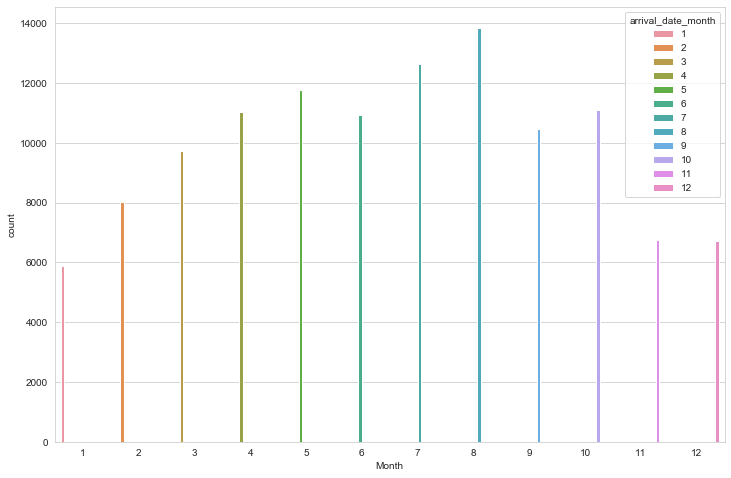

In [175]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.countplot('arrival_date_month',data=df,hue='arrival_date_month')
plt.xlabel("Month")

In [176]:
df.groupby('country').count().sort_values(by=['hotel'],ascending=0)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
country,,,,,,,,,,,,,,,,,,,,,
PRT,48586,48586,48586,48586,48586,48586,48586,48586,48586,48586,...,48586,48586,48586,48586,48586,48586,48586,48586,48586,48586
GBR,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129,...,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129
FRA,10415,10415,10415,10415,10415,10415,10415,10415,10415,10415,...,10415,10415,10415,10415,10415,10415,10415,10415,10415,10415
ESP,8568,8568,8568,8568,8568,8568,8568,8568,8568,8568,...,8568,8568,8568,8568,8568,8568,8568,8568,8568,8568
DEU,7287,7287,7287,7287,7287,7287,7287,7287,7287,7287,...,7287,7287,7287,7287,7287,7287,7287,7287,7287,7287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLI,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MMR,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MRT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [177]:
df['previous_cancellations']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: previous_cancellations, Length: 118898, dtype: int64

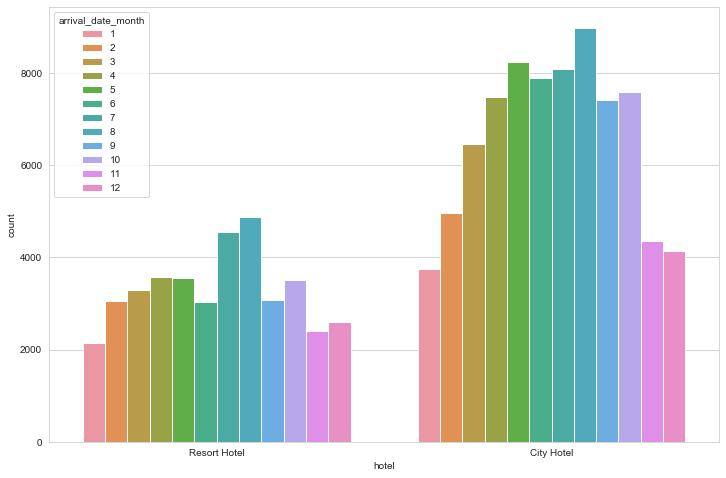

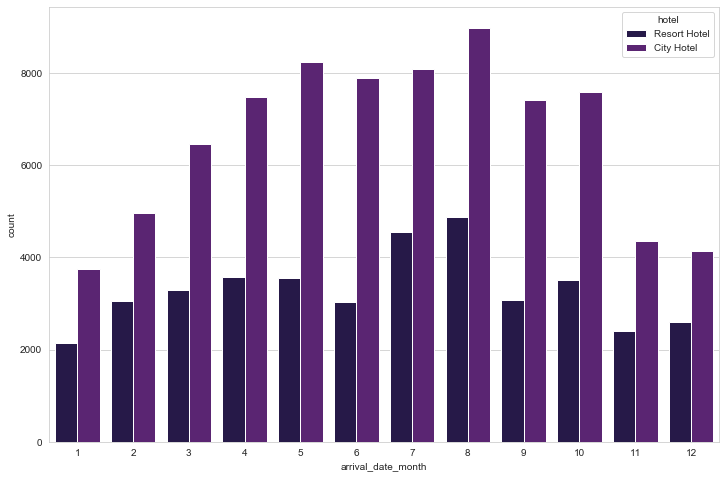

In [178]:
plt.figure(figsize=(12,8))
sns.countplot('hotel',data=df,hue='arrival_date_month')

plt.figure(figsize=(12,8))
sns.countplot('arrival_date_month',data=df,hue='hotel')

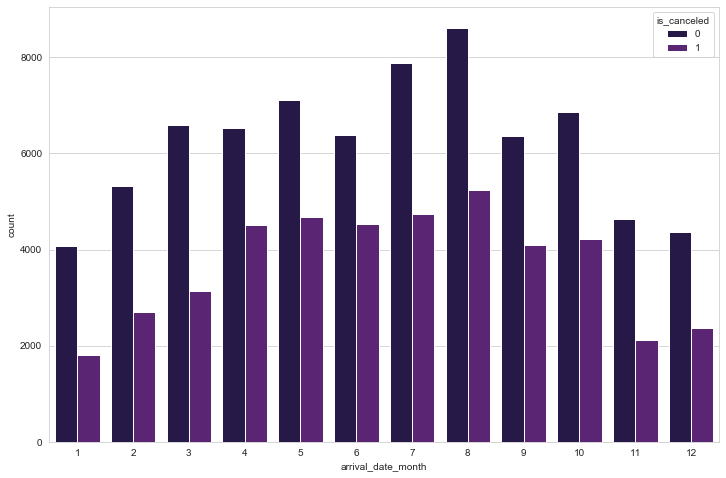

In [179]:
plt.figure(figsize=(12,8))
sns.countplot('arrival_date_month',data=df,hue='is_canceled')

Text(0, 0.5, 'Count')

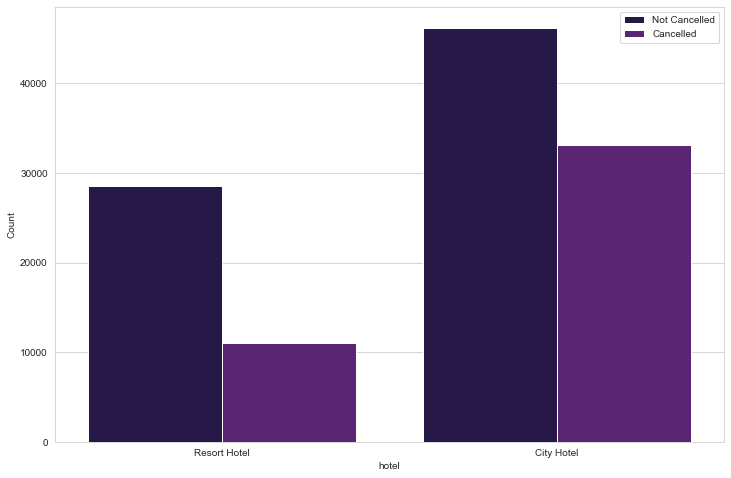

In [180]:
plt.figure(figsize=(12,8))
sns.countplot('hotel',data=df,hue='is_canceled')
plt.legend(["Not Cancelled","Cancelled"])
plt.ylabel("Count")

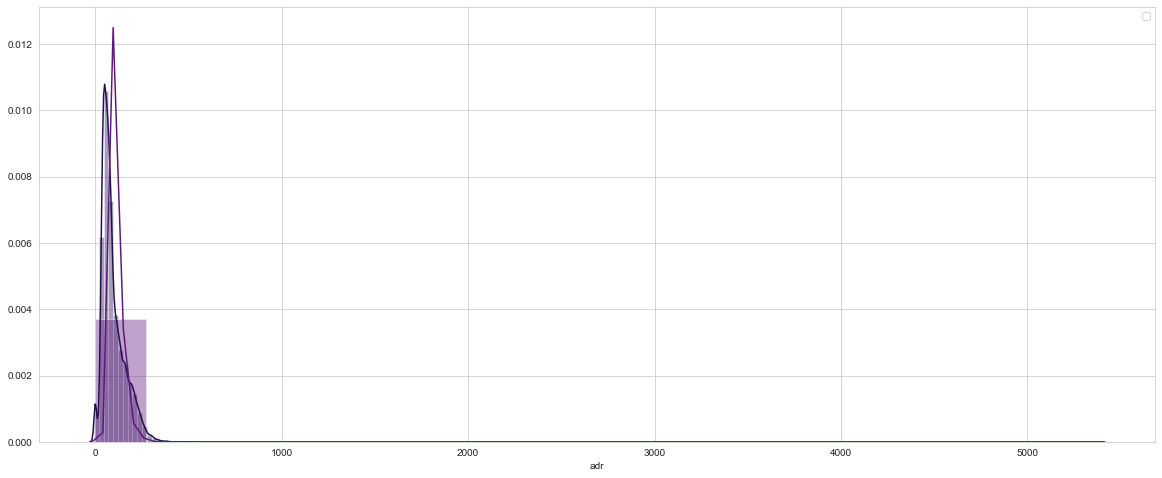

In [181]:
plt.figure(figsize=(20,8))
plt.legend(["Resort","City"])
ax = sns.distplot(df[df["hotel"] == "Resort Hotel"]['adr'],bins=20)
sns.distplot(df[df["hotel"] == "City Hotel"]['adr'],bins=20,ax=ax)

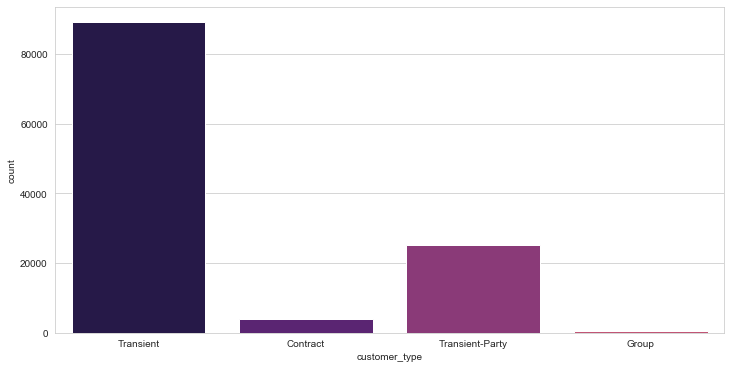

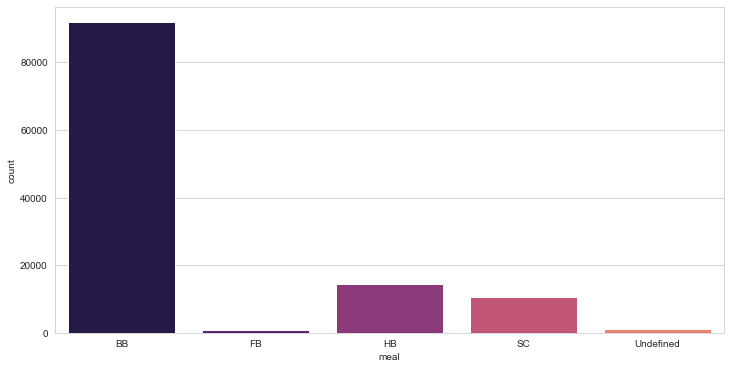

In [182]:
plt.figure(figsize=(12,6))
sns.countplot(df['customer_type'])

plt.figure(figsize=(12,6))
sns.countplot(df['meal'])


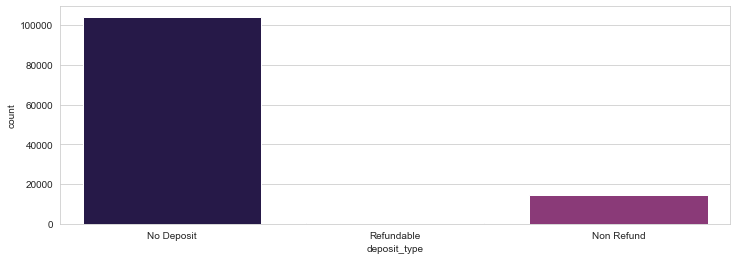

In [183]:
plt.figure(figsize=(12,4))
sns.countplot(df['deposit_type'])

In [184]:
len(df.columns)

29

## Data Modelling

In [186]:
df=pd.get_dummies(df,prefix=['hotel', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'])

In [187]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,1,0,0,0,0,1,0,0,1,0


In [188]:
df.dtypes.value_counts()

uint8      228
int64       17
float64      2
dtype: int64

In [189]:
X = df.drop('is_canceled',axis=1)
y =  df['is_canceled']

In [190]:
from sklearn.model_selection import train_test_split

In [200]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [205]:
X_train.shape

(83228, 246)

In [214]:
model = Sequential()

model.add(Dense(246,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(123,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])


In [215]:
from tensorflow.keras.callbacks import EarlyStopping

In [216]:
early = EarlyStopping(patience=5)

In [217]:
model.fit(x=X_train.values,y=y_train.values,validation_data=(X_test,y_test),batch_size=64,epochs=10,verbose=1,callbacks=[early])

Train on 83228 samples, validate on 35670 samples
Epoch 1/10
83228/83228 [==============================] - 15s 174us/sample - loss: 1.8084 - accuracy: 0.6272 - val_loss: 0.6100 - val_accuracy: 0.6739
Epoch 2/10
83228/83228 [==============================] - 13s 150us/sample - loss: 0.5905 - accuracy: 0.6692 - val_loss: 0.3379 - val_accuracy: 0.8803
Epoch 3/10
83228/83228 [==============================] - 13s 153us/sample - loss: 0.1782 - accuracy: 0.9322 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 4/10
83228/83228 [==============================] - 13s 155us/sample - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 5/10
83228/83228 [==============================] - 12s 146us/sample - loss: 0.0477 - accuracy: 0.9842 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 6/10
83228/83228 [==============================] - 13s 152us/sample - loss: 0.0395 - accuracy: 0.9820 - val_loss: 0.0036 - val_accuracy: 0.9998
Epoch 7/10
83228/83228 [====================

In [232]:
metrics = pd.DataFrame(model.history.history)

In [234]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.808375,0.627157,0.609982,0.673900
1,0.590452,0.669174,0.337894,0.880292
2,0.178202,0.932222,0.004860,0.999355
3,0.042902,0.987180,0.001928,0.999776
4,0.047670,0.984236,0.001628,0.999608
5,0.039535,0.982049,0.003585,0.999832
6,0.101420,0.964183,0.033804,0.999804
7,0.136264,0.965913,0.033839,0.999888
8,0.137109,0.965625,0.032115,0.999832
9,0.228712,0.926179,0.099501,0.999523


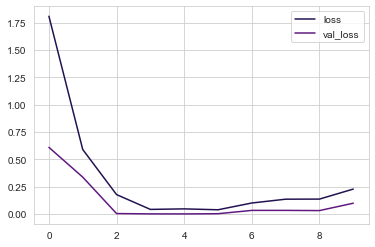

In [235]:
metrics[['loss','val_loss']].plot()

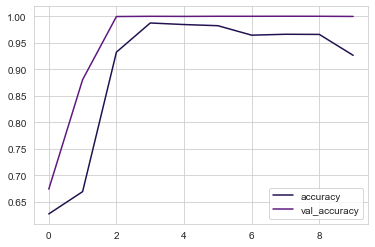

In [237]:
metrics[['accuracy','val_accuracy']].plot()

In [218]:
model.evaluate(X_test,y_test)

35670/35670 [==============================] - 5s 146us/sample - loss: 0.0995 - accuracy: 0.9995


[0.09950070815374445, 0.9995234]

In [224]:
pred = model.predict_classes(X_test)

In [230]:
from sklearn.metrics import confusion_matrix,classification_report

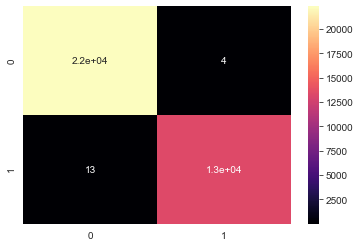

In [278]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='magma')

In [231]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22318
           1       1.00      1.00      1.00     13352

    accuracy                           1.00     35670
   macro avg       1.00      1.00      1.00     35670
weighted avg       1.00      1.00      1.00     35670



In [258]:
n = 588
ex = X_test.iloc[n]
ex

lead_time                         103.0
arrival_date_year                2016.0
arrival_date_month                 10.0
arrival_date_week_number           43.0
arrival_date_day_of_month          21.0
                                  ...  
customer_type_Transient             1.0
customer_type_Transient-Party       0.0
reservation_status_Canceled         1.0
reservation_status_Check-Out        0.0
reservation_status_No-Show          0.0
Name: 59146, Length: 246, dtype: float64

In [259]:
ex = scaler.transform(ex.values.reshape(-1, 246))
ex

array([[0.13975577, 0.5       , 0.81818182, 0.80769231, 0.66666667,
        0.0625    , 0.04878049, 0.04      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02565118, 0.        , 0.2       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [260]:
model.predict_classes(ex)

array([[1]])

In [261]:
y_test.iloc[n]

1

In [263]:
from tensorflow.keras.models import save_model

In [265]:
model.save("model_wtht_scaling.h5")

In [266]:
from sklearn.preprocessing import MinMaxScaler

In [267]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [270]:
model = Sequential()

model.add(Dense(246,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(123,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])


In [271]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test),batch_size=64,epochs=10,verbose=1,callbacks=[early])

Train on 83228 samples, validate on 35670 samples
Epoch 1/10
83228/83228 [==============================] - 14s 173us/sample - loss: 0.0087 - accuracy: 0.9969 - val_loss: 1.1657e-06 - val_accuracy: 1.0000
Epoch 2/10
83228/83228 [==============================] - 13s 157us/sample - loss: 7.2386e-06 - accuracy: 1.0000 - val_loss: 1.6573e-07 - val_accuracy: 1.0000
Epoch 3/10
83228/83228 [==============================] - 14s 170us/sample - loss: 2.1987e-06 - accuracy: 1.0000 - val_loss: 4.5580e-08 - val_accuracy: 1.0000
Epoch 4/10
83228/83228 [==============================] - 14s 165us/sample - loss: 8.1839e-07 - accuracy: 1.0000 - val_loss: 1.0705e-08 - val_accuracy: 1.0000
Epoch 5/10
83228/83228 [==============================] - 12s 148us/sample - loss: 3.3683e-07 - accuracy: 1.0000 - val_loss: 3.6428e-09 - val_accuracy: 1.0000
Epoch 6/10
83228/83228 [==============================] - 12s 146us/sample - loss: 1.6777e-07 - accuracy: 1.0000 - val_loss: 1.2194e-09 - val_accuracy: 1.0000


In [272]:
metrics = pd.DataFrame(model.history.history)

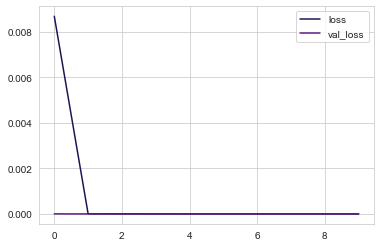

In [273]:
metrics[['loss','val_loss']].plot()

In [279]:
model.evaluate(X_test,y_test)

35670/35670 [==============================] - 6s 162us/sample - loss: 2.6245e-11 - accuracy: 1.0000


[2.6245322547162295e-11, 1.0]

In [280]:
pred = model.predict_classes(X_test)

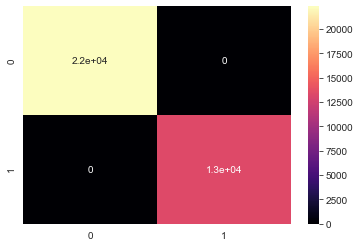

In [281]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap="magma")

In [282]:
model.save("mode_scaled.h5")

# Fin.